# PROJECT 2


## Import necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from xgboost import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.describe()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Sepal Length (cm)  150 non-null    float64
 2   Sepal Width (cm)   150 non-null    float64
 3   Petal Length (cm)  150 non-null    float64
 4   Petal Width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# there are no null entries in the csv file.
data_copy = data.copy() # keep original data in case any changes are made to the copy.
y = data_copy.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
X = data_copy.drop(['Species', 'Id'], axis=1)

In [8]:
X.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
1,Sepal Width (cm),1.000869
0,Sepal Length (cm),-1.028284
3,Petal Width (cm),-1.626260
2,Petal Length (cm),-1.716813


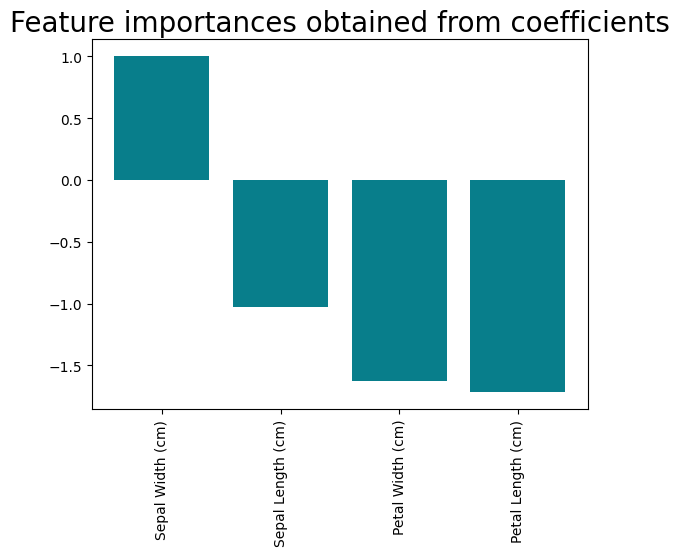

In [12]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
prediction_model = RandomForestClassifier(random_state=0)
prediction_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
prediction = prediction_model.predict(X_val)
mean_absolute_error(prediction, y_val)

0.02631578947368421

In [15]:
prediction

array([0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1], dtype=int64)

In [16]:
y_val

9      0
6      0
140    2
27     0
62     1
148    2
146    2
129    2
116    2
17     0
18     0
118    2
25     0
119    2
124    2
128    2
49     0
67     1
85     1
127    2
88     1
44     0
142    2
87     1
121    2
32     0
143    2
15     0
108    2
95     1
79     1
84     1
39     0
58     1
20     0
135    2
123    2
94     1
Name: Species, dtype: int64

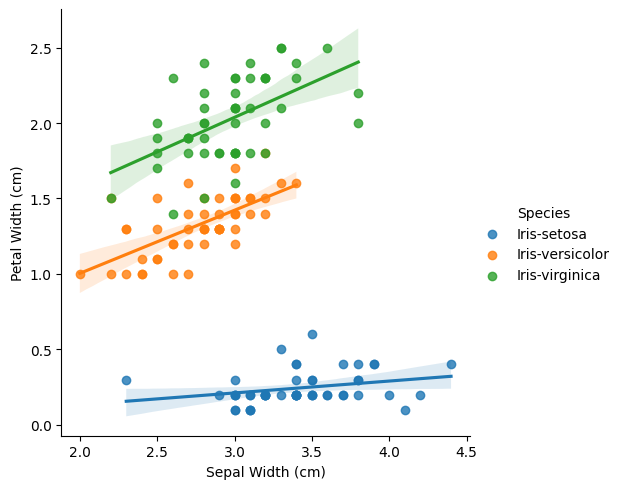

In [17]:
sns.lmplot(x="Sepal Width (cm)", y="Petal Width (cm)", hue="Species", data=data)